In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("../perf.csv")

# strip spaces from each column name
data.columns = data.columns.str.strip()

# filter out <init> and <clinit> methods
data = data[~(data['name'].str.contains('<init>')) & ~(data['name'].str.contains('<clinit>'))]

# scale to seconds
for timecol in ["PEG2PEGTIME", "PBTIME", "ENGINETIME", "Optimization took"]:
    data[timecol] = data[timecol] / 1000

In [3]:
transparency = 0.2
size = 100


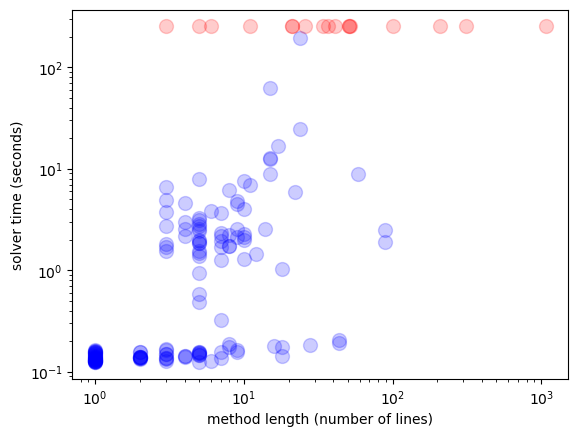

In [4]:
plt.xlabel("method length (number of lines)")
plt.ylabel("solver time (seconds)")

# passing
work = data[data["PBTIME"] >= 0]
work = work[work["length"] >= 0]
plt.scatter(work["length"], work["PBTIME"], c = "blue", s=size, alpha=transparency)

# failing
ymax = max(work["PBTIME"])
fail = data[(data["PBTIME"] < 0)]
plt.scatter(fail["length"], [ymax * 1.3] * len(fail), c = "red", s=size, alpha=transparency)
# plt.ylim(0, ymax)

plt.yscale("log")
plt.xscale("log")

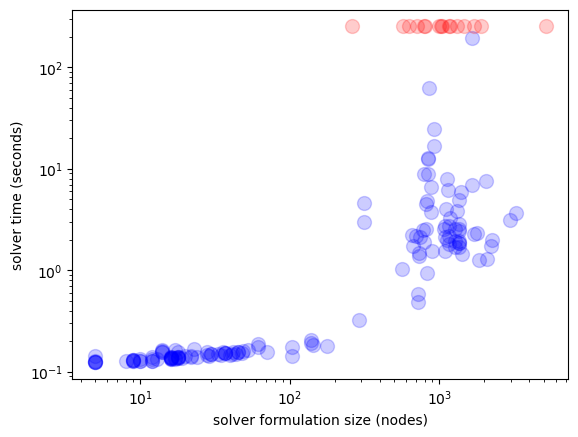

In [5]:
plt.xlabel("solver formulation size (nodes)")
plt.ylabel("solver time (seconds)")

# passing
work = data[data["PBTIME"] >= 0]
plt.scatter(work["nodes:"], work["PBTIME"], c = "blue", s=size, alpha=transparency)

# failing
ymax = max(work["PBTIME"])
fail = data[(data["PBTIME"] < 0)]
plt.scatter(fail["nodes:"], [ymax * 1.3] * len(fail), c = "red", s=size, alpha=transparency)

plt.xscale("log")
plt.yscale("log")

In [9]:
# get min size of a failure
min(fail[fail["nodes:"] > 0]["nodes:"])

262